# ARIMA Model for Weekly Total Energy Demand Forecasting

1. **Imports:**
    - pandas: For data manipulation and analysis.
    - matplotlib.pyplot: For data visualization.
    - pmdarima: For the auto ARIMA model to automatically select the best ARIMA parameters.
    - sklearn.metrics: For calculating the mean squared error (RMSE) to evaluate model performance.
    - math.sqrt: For computing the square root of the mean squared error to obtain the RMSE.

2. **Load Data:**
    - Load the energy consumption dataset from a CSV file using pd.read_csv(), with dates parsed and set as the DataFrame index.


3. **Data Exploration and Preprocessing**
    - View the raw dataset info() and head()
    - Create 'Total Energy Demand' Column: Sum the relevant columns (excluding 'use [kW]' and 'gen [kW]' due to all zeros) to calculate the total energy demand.
    - Visualize the dataset

4. **Weekly Resampling:** 
    - Aggregate the total energy demand on a weekly basis to form the time series for forecasting.

5. **Ensure Sufficient Data:**
    - Check if there are enough data points (e.g., at least 30 weeks) to proceed with modeling and forecasting.

6. **Train-Test Split:**
    - Split the weekly aggregated data into training and testing sets, reserving the last 4 weeks for testing the model's forecasting ability.

7. **Model Selection and Training:**
    - Use auto_arima from pmdarima to automatically find the best fitting ARIMA model parameters, checking for stationarity, seasonality, and model order.

8. **Model Summary:**
    - Print the summary of the best ARIMA model selected by auto_arima.

9. **Forecasting:**
    - Forecast the total energy demand for the next 4 weeks using the trained ARIMA model.

10. **Evaluation:**
    - Compute the Root Mean Squared Error (RMSE) between the actual and forecasted values.

11. **Visualization:**
    - Plot the historical data (training set), actual future values (test set), and the model's forecasts.


**Conclusion:**
The auto model works well in choosing the best ARIMA model for making our predictions, however due to a limited dataset, being only 53 instances, the RMSE scores poorly at 1474.30. This result is viewable in the new months predicted data, which is off from the actual data that shows a sharp drop in January's total energy useage. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502743 entries, 2016-01-01 00:00:00 to 2016-12-31 23:59:00
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   use [kW]                          502743 non-null  float64
 1   gen [kW]                          502743 non-null  float64
 2   KitchenDenLights [kW]             502743 non-null  float64
 3   MasterBedBathLights [kW]          502743 non-null  float64
 4   MasterOutlets [kW]                502743 non-null  float64
 5   DenOutdoorLights [kW]             502743 non-null  float64
 6   DenOutlets [kW]                   502743 non-null  float64
 7   RearBasementLights [kW]           502743 non-null  float64
 8   KitchenOutletsEast [kW]           502743 non-null  float64
 9   KitchenOutletsSouth [kW]          502743 non-null  float64
 10  DishwasherDisposalSinkLight [kW]  502743 non-null  float64
 11  Refrigerator [kW] 

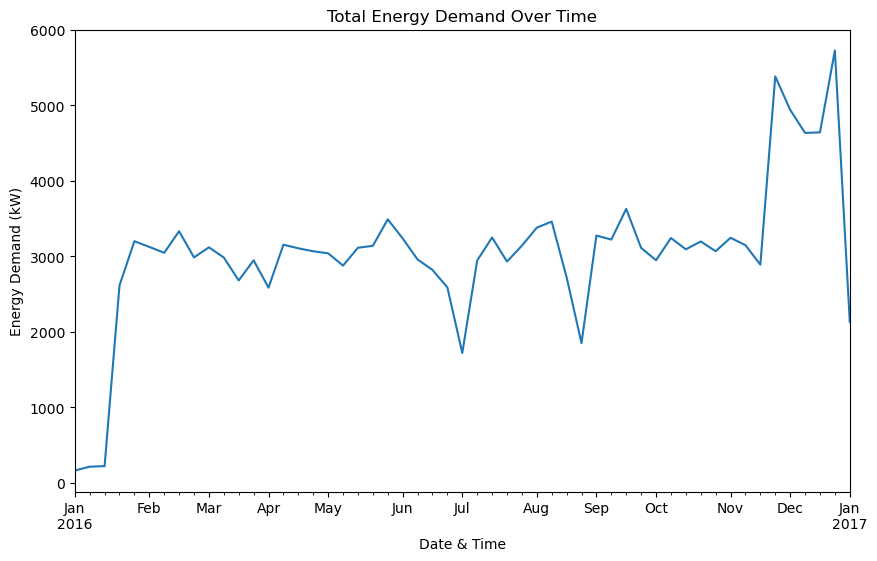

In [2]:

# Load the data
file_path = 'HomeA-meter4_2016.csv'
df = pd.read_csv(file_path, parse_dates=['Date & Time'], index_col='Date & Time')

# Data Exploration
df.info()
print(df.head())

# Create 'Total Energy Demand' column

df['Total Energy Demand'] = df.drop(columns=['use [kW]', 'gen [kW]']).sum(axis=1)
# Assuming df is your DataFrame after loading and preprocessing
df_weekly = df['Total Energy Demand'].resample('W').sum()

print(df_weekly.head())

# Plot the total energy demand
df_weekly.plot(figsize=(10, 6))
plt.ylabel('Energy Demand (kW)')
plt.title('Total Energy Demand Over Time')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=766.409, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=761.183, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=762.066, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=761.785, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=760.316, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.466 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -379.158
Date:                Fri, 23 Feb 2024   AIC                            760.316
Time:                        19:26:20   BIC                            762.187
Sample:                    01-03-2016   HQIC                           761.023
                    

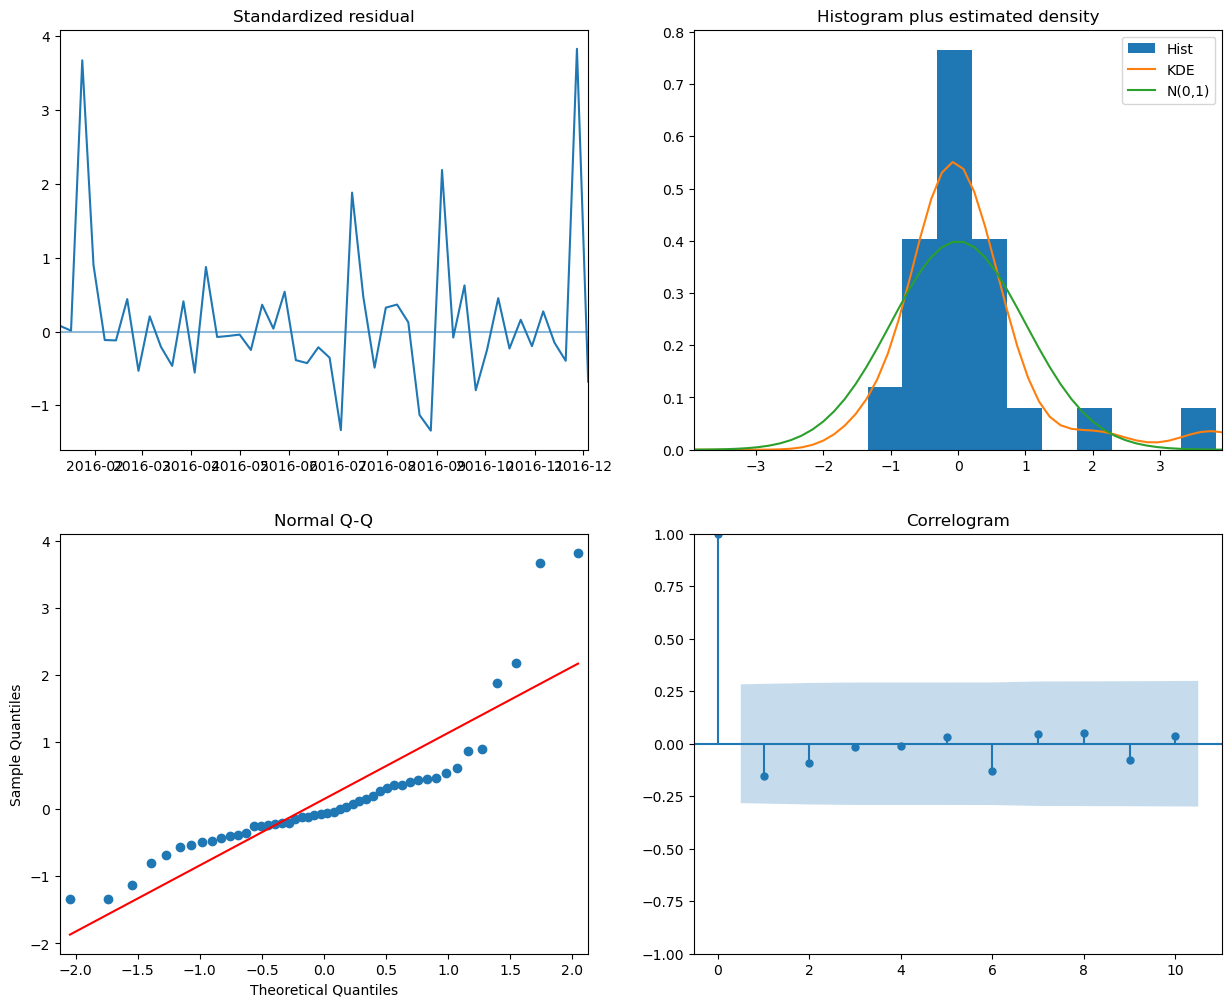

Test RMSE: 1474.2969172637277


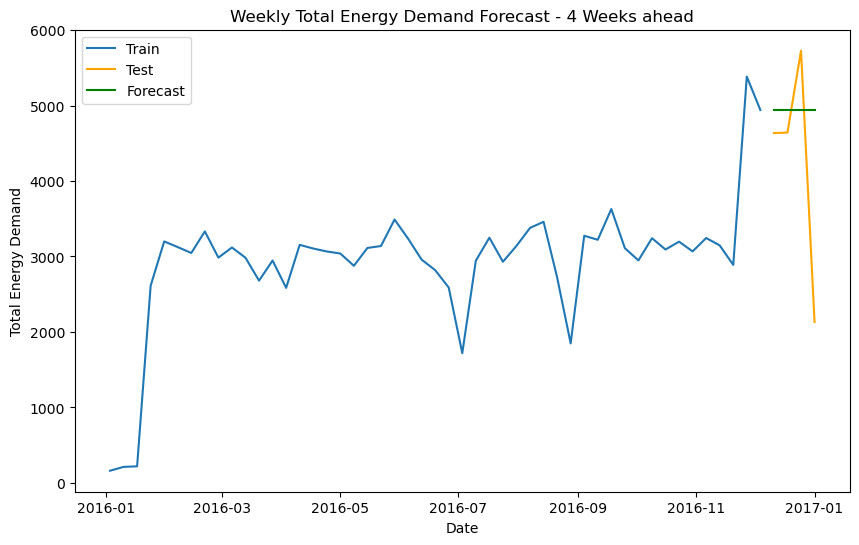

In [3]:
# Create an ARIMA model based on the best fit using auto_arima

# Ensure there's enough data to split into train and test
if len(df_weekly) < 30:  # threshold to ensure enough data points
    print("Not enough data points for meaningful modeling.")
else:
    # Splitting the data into train and test sets
    n_test = 4  # number of data points to withhold for testing
    train, test = df_weekly[:-n_test], df_weekly[-n_test:]

    # Using auto_arima to find the best ARIMA parameters, ignoring seasonal components
    auto_model = auto_arima(train, seasonal=True, stepwise=True, suppress_warnings=True,
                            error_action="ignore", max_order=None, trace=True)

    print(auto_model.summary())

    # Fit ARIMA model (auto_arima wraps the ARIMA model and fits it to the data)
    # The best fitted model is returned by auto_arima
    model_fit = auto_model.fit(train)

    model_fit.plot_diagnostics(figsize=(15, 12))
    plt.show()
    
    # Forecast
    forecast = model_fit.predict(n_periods=n_test)

    # Evaluation
    rmse = sqrt(mean_squared_error(test, forecast))
    print(f'Test RMSE: {rmse}')

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, color='orange', label='Test')
    plt.plot(test.index, forecast, color='green', label='Forecast')
    plt.title('Weekly Total Energy Demand Forecast - 4 Weeks ahead')
    plt.xlabel('Date')
    plt.ylabel('Total Energy Demand')
    plt.legend()
    plt.show()